## Hysteresis and log-log calibration example

Given a calibration of an instrument for an increasing and decreasing input $x$ [mV] and output of the instrument $y$ [mV]

In [13]:
import numpy as np
import pylab as pl

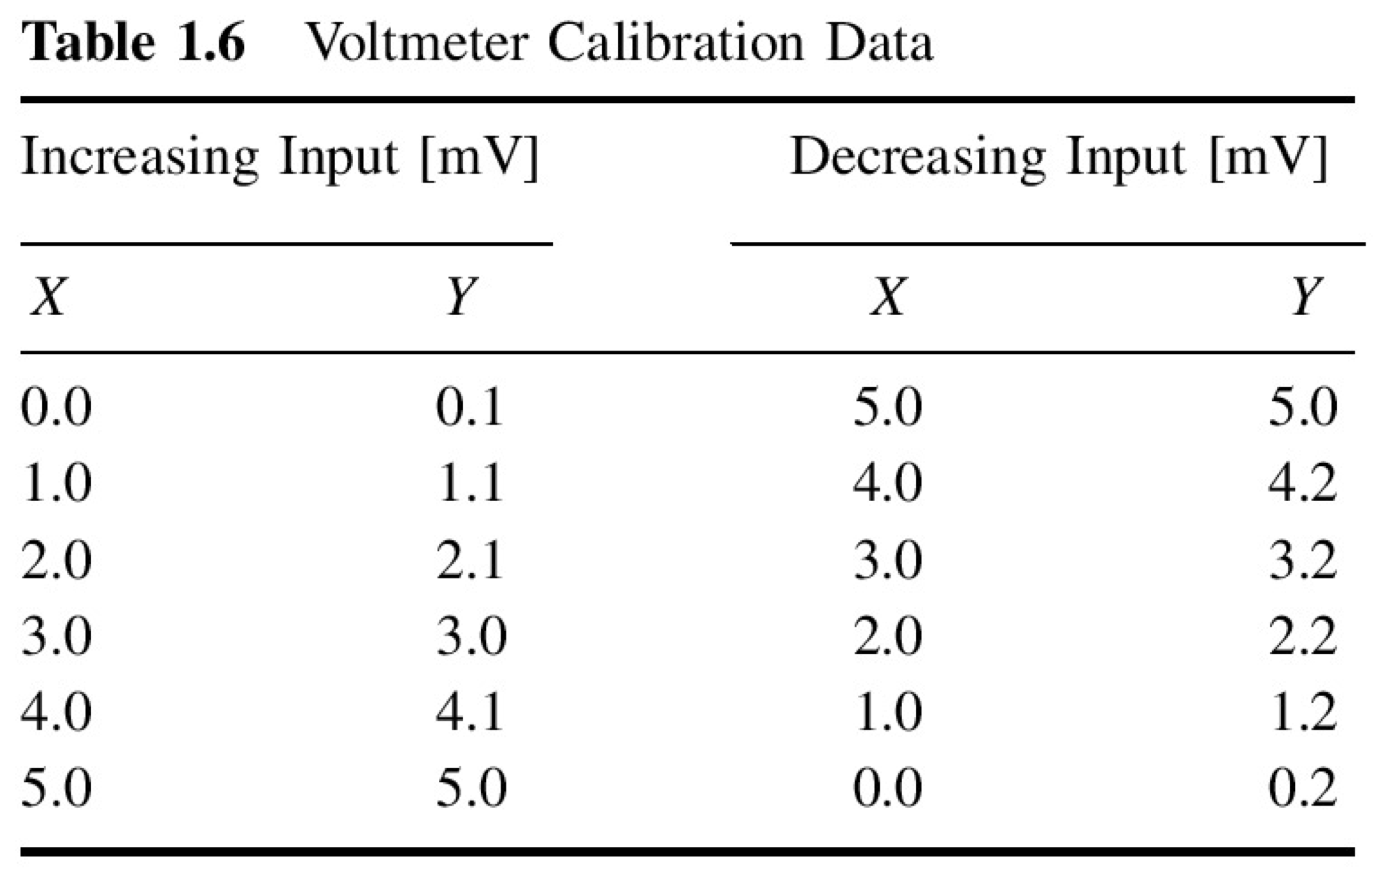

In [14]:
from IPython.core.display import Image 
Image(filename='hysteresis_example.png',width=400)

In [15]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])
y = np.array([0.1, 1.1, 2.1, 3.0, 4.1, 5.0, 5.0, 4.2, 3.2, 2.2, 1.2, 0.2])


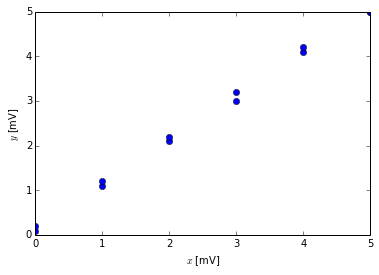

In [16]:
pl.plot(x,y,'o')
pl.xlabel('$x$ [mV]')
pl.ylabel('$y$ [mV]')


1. We see the error, but we do not know if it is a random or not
2. In order to see the hysteresis, we have to set the plot with the lines connecting points:

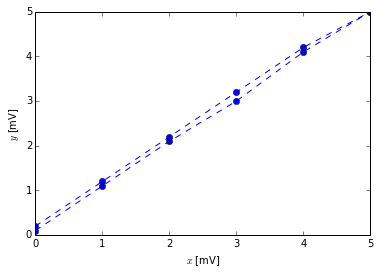

In [17]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [mV]')
pl.ylabel('$y$ [mV]')

### Estimate the hysteresis error:

$e_h = y_{up} - y_{down}$

$e_{h_{max}} = max(|e_h|)$

$e_{h_{max}}\% = 100\% \cdot \frac{e_{h_{max}}}{y_{max}-y_{min}} $

In [18]:
e_h = y[:6]-np.flipud(y[6:]) 
print "e_h =", e_h,"[mV]"

e_h = [-0.1 -0.1 -0.1 -0.2 -0.1  0. ] [mV]


In [19]:
e_hmax = np.max(np.abs(e_h))
print "e_hmax= %3.2f %s" % (e_hmax,"[mV]")

e_hmax= 0.20 [mV]


In [20]:
e_hmax_p = 100*e_hmax/(np.max(y) - np.min(y))
print "Relative error = %3.2f%s FSO" % (e_hmax_p,"%")

Relative error = 4.08% FSO


# Sensitivity error example

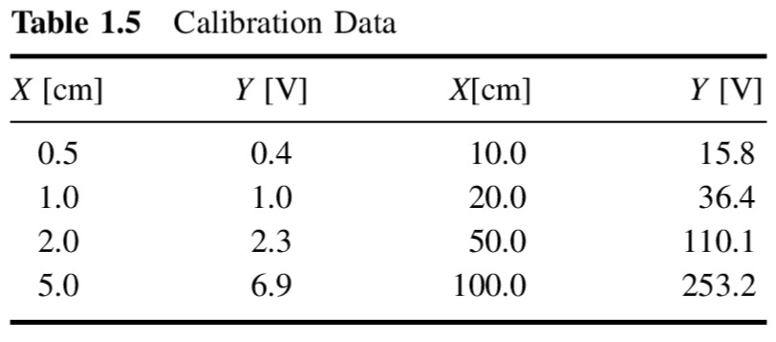

In [21]:
from IPython.core.display import Image 
Image(filename='sensitivity_error_example.png',width=400) 

In [22]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

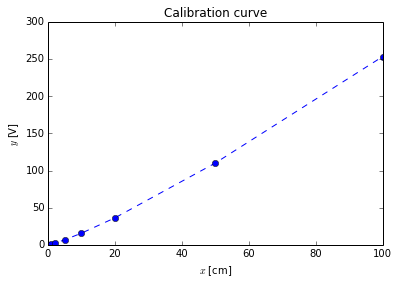

In [23]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Calibration curve')

Sensitivity, $K$ is:

$ K_i  = \left( \frac{\partial y}{\partial x} \right)_{x_i} $

In [24]:
K = np.diff(y)/np.diff(x)
print K

[ 1.2         1.3         1.53333333  1.78        2.06        2.45666667
  2.862     ]


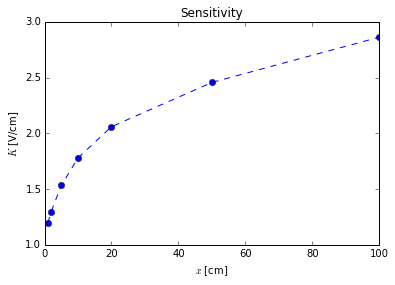

In [25]:
pl.plot(x[1:],K,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Sensitivity')

Instead of working with non-linear curve of sensitivity we can use the usual trick: the logarithmic scale

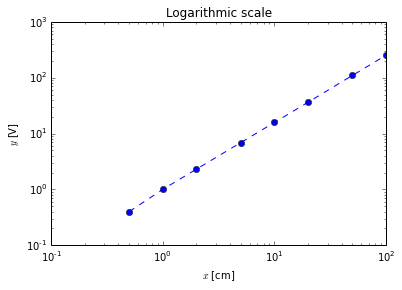

In [26]:
pl.loglog(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')

[ 1.32192809  1.20163386  1.19897785  1.19525629  1.20401389  1.20793568
  1.20146294]


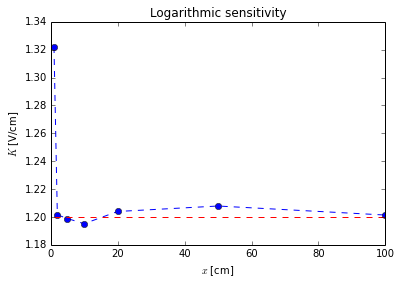

In [27]:
logK = np.diff(np.log(y))/np.diff(np.log(x))
print logK
pl.plot(x[1:],logK,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Logarithmic sensitivity')
pl.hold(True)
pl.plot([x[1],x[-1]],[1.2,1.2],'r--')

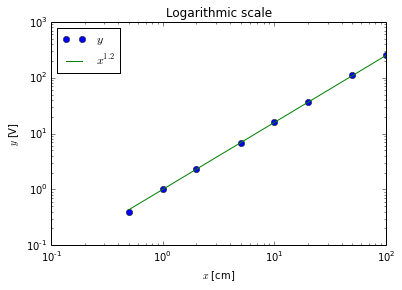

In [28]:
pl.loglog(x,y,'o',x,x**(1.2))
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

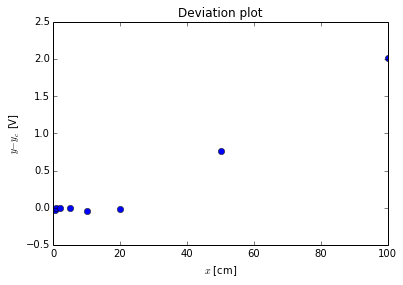

In [29]:
pl.plot(x,y-x**(1.2),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [30]:
from math import sqrt
def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    if len(X) != len(Y):  raise ValueError, 'unequal length'
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in map(None, X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    a, b = (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
    meanerror = residual = 0.0
    for x, y in map(None, X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
    RR = 1 - residual/meanerror
    ss = residual / (N-2)
    Var_a, Var_b = ss * N / det, ss * Sxx / det
    #print "y=ax+b"
    #print "N= %d" % N
    #print "a= %g \\pm t_{%d;\\alpha/2} %g" % (a, N-2, sqrt(Var_a))
    #print "b= %g \\pm t_{%d;\\alpha/2} %g" % (b, N-2, sqrt(Var_b))
    #print "R^2= %g" % RR
    #print "s^2= %g" % ss
    return a, b, RR

In [31]:
print linreg(np.log(x),np.log(y))

(1.2103157469888082, -0.028846347359456247, 0.99988882473421792)


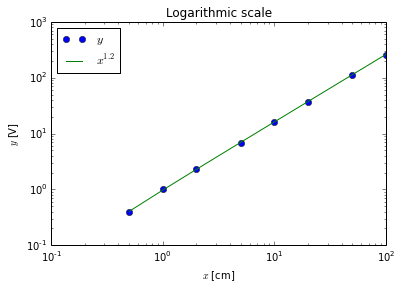

In [32]:
pl.loglog(x,y,'o',x,x**(1.21)-0.0288)
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

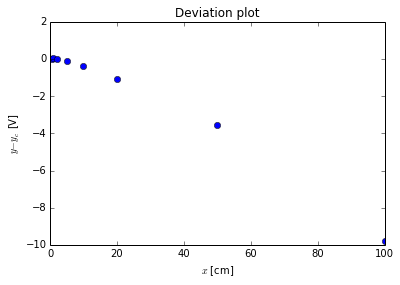

In [33]:
pl.plot(x,y-(x**(1.21)-0.0288),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')